### Project Summary

This project focuses on developing a machine learning model to classify chest X-ray images into two categories: "NORMAL" and "PNEUMONIA". The steps followed in this project are summarized below:

1. **Environment Setup:**
   - Installed necessary libraries (`opencv-python` and `tensorflow`).

2. **Data Loading and Preprocessing:**
   - Defined a function `load_images_and_labels` to load images and labels from a specified folder. The images were read in grayscale, and labels were assigned based on the filename.
   - Preprocessed the images by resizing them to a uniform size of 64x64 pixels and normalizing the pixel values to the range [0, 1].

3. **Data Splitting:**
   - Split the dataset into training (60%), cross-validation (20%), and test (20%) sets using `train_test_split`.

4. **Dataset Saving:**
   - Saved the training, cross-validation, and test sets as HDF5 files using the `save_dataset` function for efficient storage and retrieval.

5. **Data Inspection:**
   - Inspected the HDF5 files to ensure correct data storage and label distribution.

6. **Dataset Loading:**
   - Loaded the datasets from the HDF5 files for training and evaluation.

7. **Data Flattening:**
   - Flattened the images for input into the neural network model.

8. **Model Development:**
   - Developed a Sequential neural network model using TensorFlow and Keras. The model architecture included:
     - A Flatten layer to convert 2D image arrays into 1D arrays.
     - Dense layers with ReLU activation.
     - Dropout layers for regularization.
     - Output layer with softmax activation for classification.

9. **Model Training and Evaluation:**
   - Compiled the model with Adam optimizer and sparse categorical cross-entropy loss.
   - Trained the model using the training data and validated it using the cross-validation data.
   - Evaluated the model on the test set to measure performance.

10. **Model Regularization:**
    - Experimented with different regularization techniques:
      - L2 regularization with different penalty rates.
      - Dropout regularization with different dropout rates.
      - Combined L2 and Dropout regularization to improve the model's generalization ability.

11. **Visualization:**
    - Plotted training and validation loss to monitor the model's performance during training.

12. **Prediction:**
    - Used the trained model to make predictions on random test images and compared the predictions with the actual labels.

### Key Outcomes:

- The model was trained and evaluated on a well-defined dataset, demonstrating the ability to classify chest X-ray images with decent accuracy.
- Regularization techniques like L2 and Dropout were applied to mitigate overfitting and improve model generalization.
- The project includes a complete workflow from data preprocessing to model training, evaluation, and prediction.

### Potential Improvements:

- Increase the dataset size by including more images for better training and evaluation.
- Experiment with different neural network architectures, such as Convolutional Neural Networks (CNNs), which are more suitable for image classification tasks.
- Perform data augmentation to artificially increase the dataset size and improve the model's robustness.
- Fine-tune hyperparameters using techniques like grid search or random search to optimize model performance further.

In [1]:
#!pip install opencv-python

In [2]:
#!pip install tensorflow

In [3]:
import os
import numpy as np
import cv2
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

2024-06-11 22:55:30.760690: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [4]:
# Function to load images and labels in grayscale
def load_images_and_labels(folder):
    images = []
    labels = []

    for filename in os.listdir(folder):
        img_path = os.path.join(folder, filename)
        if filename.startswith('NORMAL'):
            labels.append('NORMAL')
        elif filename.startswith('VIRUS') or filename.startswith('BACTERIA'):
            labels.append('PNEUMONIA')
        else:
            # Skip unrelated files
            continue

        if os.path.isfile(img_path):
            # Read image as grayscale
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
            if img is not None:
                images.append(img)

    return images, labels

In [5]:
# Load images and labels from folder
folder_path = "/Users/jonathantrejo/Desktop/Deep Learning/chest_xray/All data"
images, labels = load_images_and_labels(folder_path)

In [6]:
# Convert labels to numerical values
label_encoder = LabelEncoder()
labels_encoded = label_encoder.fit_transform(labels)

In [7]:
# Preprocess images (resize, normalize, etc.)
def preprocess_images(images, size=(64, 64)):
    processed_images = []
    for img in images:
        # Resize images to the specified size
        resized_img = cv2.resize(img, size)
        
        # Normalize pixel values to be between 0 and 1
        normalized_img = resized_img / 255.0
        
        # Expand dimensions to retain consistency in shape for deep learning models
        processed_images.append(np.expand_dims(normalized_img, axis=-1))
    return np.array(processed_images)

processed_images = preprocess_images(images)



In [8]:
# Split the data into training, cross-validation, and test sets
x_train, x_test, y_train, y_test = train_test_split(processed_images, labels_encoded, test_size=0.2, train_size=0.8, random_state=42)
x_train, x_cv, y_train, y_cv = train_test_split(x_train, y_train, test_size=0.25, train_size=0.75, random_state=42)

In [9]:
# Report the number of examples in each set
num_train_examples = len(x_train)
num_cv_examples = len(x_cv)
num_test_examples = len(x_test)

print(f"Number of examples in training set: {num_train_examples}")
print(f"Number of examples in cross-validation set: {num_cv_examples}")
print(f"Number of examples in test set: {num_test_examples}")
classes = ['NORMAL', 'PNEUMONIA']

Number of examples in training set: 3513
Number of examples in cross-validation set: 1171
Number of examples in test set: 1172


In [10]:
from collections import Counter

In [11]:
import h5py
import numpy as np
from sklearn.preprocessing import LabelEncoder

# Function to save a single dataset to an HDF5 file
def save_dataset(h5_path, x_data, y_data, x_name, y_name):
    with h5py.File(h5_path, 'w') as h5f:
        # Create datasets for images and labels
        h5f.create_dataset(x_name, data=np.array(x_data, dtype='float32'))
        h5f.create_dataset(y_name, data=np.array(y_data, dtype='S'))
        h5f.create_dataset('list_classes', data=np.array(['NORMAL', 'PNEUMONIA'], dtype='S'))

# Example usage:
train_h5_path = '/Users/jonathantrejo/Desktop/Deep Learning/chest_xray/train_data.h5'
test_h5_path = '/Users/jonathantrejo/Desktop/Deep Learning/chest_xray/test_data.h5'
cv_h5_path = '/Users/jonathantrejo/Desktop/Deep Learning/chest_xray/cv_data.h5'

# Save the training dataset
save_dataset(train_h5_path, x_train, y_train, 'x_train', 'y_train')

# Save the testing dataset
save_dataset(test_h5_path, x_test, y_test, 'x_test', 'y_test')

# Save the cross-validation dataset
save_dataset(cv_h5_path, x_cv, y_cv, 'x_cv', 'y_cv')

print("Training, testing, and cross-validation datasets have been saved to separate HDF5 files.")


Training, testing, and cross-validation datasets have been saved to separate HDF5 files.


In [12]:
# Function to inspect HDF5 file and check label distribution
def inspect_h5_distribution(file_path, label_dataset):
    # Open the HDF5 file in read mode
    with h5py.File(file_path, 'r') as h5f:
        # List all datasets and groups in the file
        print(f"\nContents of '{file_path}':")
        for key in h5f.keys():
            print(f" - {key}: {h5f[key].shape}, {h5f[key].dtype}")

        # Extract the label dataset and calculate label distribution
        labels = h5f[label_dataset][:]
        label_counts = Counter(labels)

        # Decode the numeric labels using the saved list_classes
        label_names = h5f['list_classes'][:].astype(str)
        distribution = {label_names[i]: count for i, count in label_counts.items()}

        print(f"Label Distribution ({label_dataset}):")
        for label, count in distribution.items():
            print(f" - {label}: {count} samples")

# Example usage: Provide paths to your HDF5 files
train_h5_path = '/Users/jonathantrejo/Desktop/Deep Learning/chest_xray/train_data.h5'
test_h5_path = '/Users/jonathantrejo/Desktop/Deep Learning/chest_xray/test_data.h5'
cv_h5_path = '/Users/jonathantrejo/Desktop/Deep Learning/chest_xray/cv_data.h5'


In [13]:
# find your current directory
import os
curDir = os.getcwd()
print(curDir)

/Users/jonathantrejo/Desktop/Deep Learning/chest_xray


In [14]:
# import
import numpy as np
import matplotlib.pyplot as plt
import h5py 
import scipy
from PIL import Image
from scipy import ndimage
#from lr_utils import load_dataset

%matplotlib inline

In [15]:
import numpy as np
import h5py
    
def load_dataset():
    train_dataset = h5py.File('train_data.h5', "r")
    train_set_x_orig = np.array(train_dataset["x_train"][:]) # your train set features
    train_set_y_orig = np.array(train_dataset["y_train"][:]) # your train set labels

    test_dataset = h5py.File('test_data.h5', "r")
    test_set_x_orig = np.array(test_dataset["x_test"][:]) # your test set features
    test_set_y_orig = np.array(test_dataset["y_test"][:]) # your test set labels

    cv_dataset = h5py.File('cv_data.h5', "r")
    cv_set_x_orig = np.array(cv_dataset["x_cv"][:]) # your cv set features
    cv_set_y_orig = np.array(cv_dataset["y_cv"][:]) # your cv set labels

    classes = np.array(test_dataset["list_classes"][:]) # the list of classes
    
    train_set_y_orig = train_set_y_orig.reshape((1, train_set_y_orig.shape[0]))
    test_set_y_orig = test_set_y_orig.reshape((1, test_set_y_orig.shape[0]))
    cv_set_y_orig = cv_set_y_orig.reshape((1, cv_set_y_orig.shape[0]))


    return train_set_x_orig, train_set_y_orig, test_set_x_orig, test_set_y_orig, cv_set_x_orig, cv_set_y_orig, classes

In [16]:
# Loading the data 
train_set_x_orig, train_set_y, test_set_x_orig, test_set_y, cv_set_x_orig, cv_set_y, classes = load_dataset()

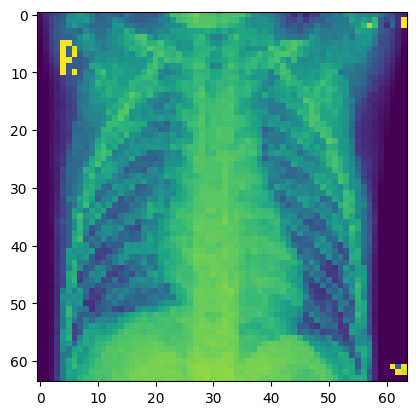

In [17]:
# Example of a picture
index = np.random.randint(0, 299)
plt.imshow(train_set_x_orig[index])
#Feel free also to change the index value and re-run to see other images.

In [18]:
# Find the values below:
m_train = train_set_x_orig.shape[0]
m_test = test_set_x_orig.shape[0]
num_px = train_set_x_orig.shape[1]


print ("Number of training examples: m_train = " + str(m_train))
print ("Number of testing examples: m_test = " + str(m_test))
print ("Height/Width of each image: num_px = " + str(num_px))
print ("Each image is of size: (" + str(num_px) + ", " + str(num_px) + ", 3)")
print ("train_set_x shape: " + str(train_set_x_orig.shape))
print ("train_set_y shape: " + str(train_set_y.shape))
print ("test_set_x shape: " + str(test_set_x_orig.shape))
print ("test_set_y shape: " + str(test_set_y.shape))

Number of training examples: m_train = 3513
Number of testing examples: m_test = 1172
Height/Width of each image: num_px = 64
Each image is of size: (64, 64, 3)
train_set_x shape: (3513, 64, 64, 1)
train_set_y shape: (1, 3513)
test_set_x shape: (1172, 64, 64, 1)
test_set_y shape: (1, 1172)


In [19]:
train_set_x_flatten = train_set_x_orig.reshape(train_set_x_orig.shape[0],-1).T
test_set_x_flatten = test_set_x_orig.reshape(test_set_x_orig.shape[0],-1).T
cv_set_x_flatten = cv_set_x_orig.reshape(cv_set_x_orig.shape[0],-1).T

print ("train_set_x_flatten shape: " + str(train_set_x_flatten.shape))
print ("train_set_y shape: " + str(train_set_y.shape))
print ("test_set_x_flatten shape: " + str(test_set_x_flatten.shape))
print ("test_set_y shape: " + str(test_set_y.shape))
print ("cv_set_x_flatten shape: " + str(cv_set_x_flatten.shape))
print ("cv_set_Y shape: " + str(cv_set_y.shape))
print ("sanity check after reshaping: " + str(train_set_x_flatten[0:5,0]))

train_set_x_flatten shape: (4096, 3513)
train_set_y shape: (1, 3513)
test_set_x_flatten shape: (4096, 1172)
test_set_y shape: (1, 1172)
cv_set_x_flatten shape: (4096, 1171)
cv_set_Y shape: (1, 1171)
sanity check after reshaping: [0.6039216  0.58431375 0.63529414 0.36862746 0.42352942]


In [20]:
train_set_x = train_set_x_flatten/255.
test_set_x = test_set_x_flatten/255.
cv_set_x = cv_set_x_flatten/255.

Import

In [21]:
import tensorflow as tf

In [22]:
tf.__version__

'2.16.1'

In [23]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout 
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import Callback
from tensorflow.keras.preprocessing import image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Model

In [24]:
model = Sequential([
    Flatten(input_shape=(64, 64, 1)),  # Input shape adjusted to 64x64x1
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [25]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.005),
    loss='sparse_categorical_crossentropy',
    metrics=[tf.keras.metrics.SparseCategoricalAccuracy()]
)

In [26]:
x_train.shape

(3513, 64, 64, 1)

In [27]:
history = model.fit(
    x_train, y_train,
    epochs=8,
    batch_size=256,
    validation_data=(x_cv, y_cv),  # Adding validation data
    verbose=2
)

Epoch 1/8
14/14 - 3s - 215ms/step - loss: 1.5956 - sparse_categorical_accuracy: 0.5986 - val_loss: 0.6063 - val_sparse_categorical_accuracy: 0.7216
Epoch 2/8
14/14 - 0s - 11ms/step - loss: 0.3934 - sparse_categorical_accuracy: 0.8187 - val_loss: 0.3238 - val_sparse_categorical_accuracy: 0.8659
Epoch 3/8
14/14 - 0s - 11ms/step - loss: 0.2845 - sparse_categorical_accuracy: 0.8839 - val_loss: 0.2590 - val_sparse_categorical_accuracy: 0.8950
Epoch 4/8
14/14 - 0s - 9ms/step - loss: 0.2603 - sparse_categorical_accuracy: 0.8978 - val_loss: 0.2391 - val_sparse_categorical_accuracy: 0.9069
Epoch 5/8
14/14 - 0s - 9ms/step - loss: 0.2316 - sparse_categorical_accuracy: 0.9081 - val_loss: 0.2068 - val_sparse_categorical_accuracy: 0.9266
Epoch 6/8
14/14 - 0s - 9ms/step - loss: 0.2026 - sparse_categorical_accuracy: 0.9240 - val_loss: 0.1902 - val_sparse_categorical_accuracy: 0.9377
Epoch 7/8
14/14 - 0s - 9ms/step - loss: 0.1916 - sparse_categorical_accuracy: 0.9268 - val_loss: 0.1757 - val_sparse_cat

In [28]:
print(history.history.keys())

dict_keys(['loss', 'sparse_categorical_accuracy', 'val_loss', 'val_sparse_categorical_accuracy'])


In [29]:
df = pd.DataFrame(history.history)
df.head()

,loss,sparse_categorical_accuracy,val_loss,val_sparse_categorical_accuracy
0,1.595558,0.598634,0.606254,0.721605
1,0.393388,0.818673,0.323773,0.865927
2,0.284534,0.883860,0.258996,0.894962
3,0.260254,0.897808,0.239144,0.906917
4,0.231587,0.908056,0.206823,0.926558


[Text(0.5, 0, 'Epochs'), Text(0, 0.5, 'Loss')]

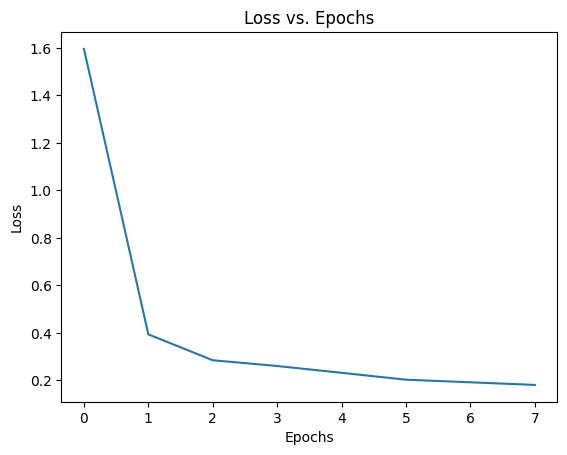

In [30]:
loss_plot = df.plot(y="loss", title = "Loss vs. Epochs", legend=False)
loss_plot.set(xlabel="Epochs", ylabel="Loss")

[Text(0.5, 0, 'Epochs'), Text(0, 0.5, 'sparse_categorical_accuracy')]

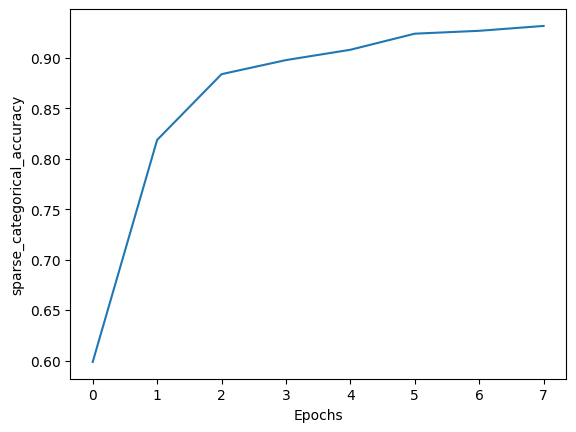

In [31]:
accuracy_plot = df.plot(y="sparse_categorical_accuracy", legend=False)
accuracy_plot.set(xlabel="Epochs", ylabel="sparse_categorical_accuracy")

# Model Evaluate on test

In [32]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)

37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1999 - sparse_categorical_accuracy: 0.9160 


# Model Predict

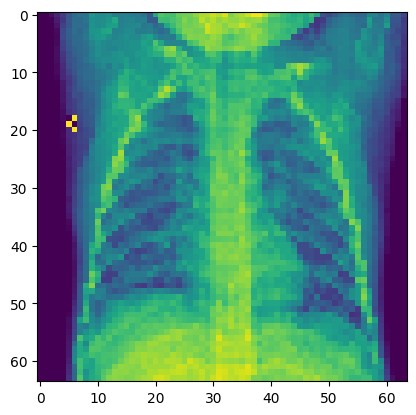

Label: PNEUMONIA


In [33]:
# Choose a random test image

random_inx = np.random.choice(x_test.shape[0])
random_inx = 30
X_sample = x_test[random_inx]
plt.imshow(X_sample)
plt.show()
print(f"Label: {labels[y_test[random_inx]]}")

In [34]:
X_sample = X_sample.reshape(1, 64, 64) # X_sample: (num_samples, X_sample.shape)
X_sample.shape

(1, 64, 64)

In [35]:
model.predict(X_sample)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


array([[9.8338991e-01, 1.6610119e-02, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 1.2363118e-22, 0.0000000e+00, 0.0000000e+00,
        7.6114246e-34, 1.8502262e-37]], dtype=float32)

In [36]:
predictions = model.predict(X_sample)
print(np.argmax(predictions))
print(f"Model prediction:{labels[np.argmax(predictions)]}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
0
Model prediction:PNEUMONIA


# Model Fit With Validation

In [37]:
model = Sequential([
    Flatten(input_shape=(64, 64, 1)),  # Input shape adjusted to 64x64x1
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [38]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.005),
    loss='sparse_categorical_crossentropy',
    metrics=[tf.keras.metrics.SparseCategoricalAccuracy()]
)

In [39]:
history = model.fit(
    x_train, y_train,
    epochs=8,
    batch_size=256,
    validation_data=(x_cv, y_cv),  # Adding validation data
    verbose=2,
    validation_split=0.2
)

Epoch 1/8
14/14 - 1s - 62ms/step - loss: 3.2494 - sparse_categorical_accuracy: 0.5887 - val_loss: 2.8276 - val_sparse_categorical_accuracy: 0.7216
Epoch 2/8
14/14 - 0s - 9ms/step - loss: 1.1663 - sparse_categorical_accuracy: 0.7145 - val_loss: 0.4055 - val_sparse_categorical_accuracy: 0.8420
Epoch 3/8
14/14 - 0s - 9ms/step - loss: 0.4422 - sparse_categorical_accuracy: 0.8389 - val_loss: 0.3095 - val_sparse_categorical_accuracy: 0.8685
Epoch 4/8
14/14 - 0s - 9ms/step - loss: 0.2958 - sparse_categorical_accuracy: 0.8822 - val_loss: 0.2636 - val_sparse_categorical_accuracy: 0.8847
Epoch 5/8
14/14 - 0s - 9ms/step - loss: 0.2303 - sparse_categorical_accuracy: 0.9075 - val_loss: 0.2005 - val_sparse_categorical_accuracy: 0.9214
Epoch 6/8
14/14 - 0s - 9ms/step - loss: 0.2151 - sparse_categorical_accuracy: 0.9177 - val_loss: 0.2047 - val_sparse_categorical_accuracy: 0.9163
Epoch 7/8
14/14 - 0s - 9ms/step - loss: 0.2151 - sparse_categorical_accuracy: 0.9129 - val_loss: 0.1858 - val_sparse_catego

In [40]:
print(history.history.keys())

dict_keys(['loss', 'sparse_categorical_accuracy', 'val_loss', 'val_sparse_categorical_accuracy'])


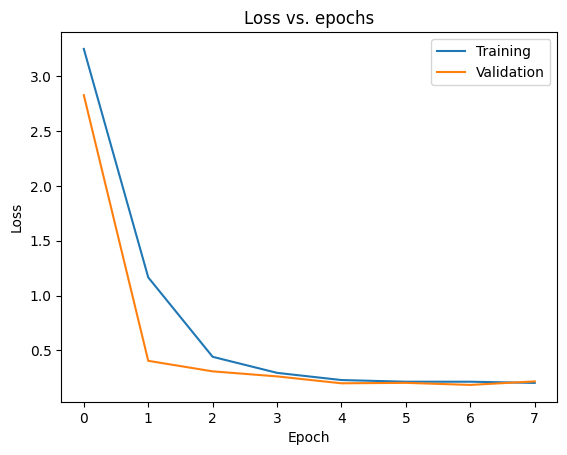

In [41]:
# Plot the training and validation loss

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()

In [42]:
# Testing mode

cv_loss, cv_accuracy = model.evaluate(x_cv, y_cv)

37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2344 - sparse_categorical_accuracy: 0.9133 


# Change the NN Model

In [43]:
model = Sequential([
    Flatten(input_shape=(64, 64, 1)),  # Input shape adjusted to 64x64x1
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

In [44]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.005),
    loss='sparse_categorical_crossentropy',
    metrics=[tf.keras.metrics.SparseCategoricalAccuracy()]
)

In [45]:
history = model.fit(x_train, y_train, epochs = 8, batch_size = 256, verbose = False, validation_split=0.2) 

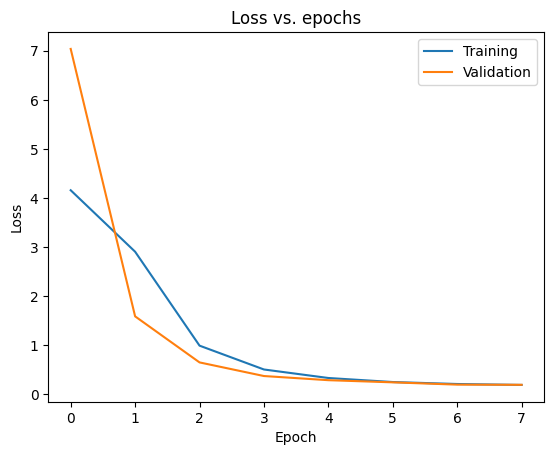

In [46]:
# Plot the training and validation loss

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()

# L2 Regularization

In [47]:
model = Sequential([
                    Flatten(input_shape = (64, 64, 1)),
                    Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)), # penalty rate (or lambda) =0.001
                    Dense(10, activation = 'softmax', kernel_regularizer=tf.keras.regularizers.l2(0.001))
])

In [48]:
model.compile(
     optimizer = tf.keras.optimizers.Adam(learning_rate = 0.005),
     loss = 'sparse_categorical_crossentropy', # Use this loss function when the y labels are integers. 
     metrics = [tf.keras.metrics.SparseCategoricalAccuracy()] # Use this accuracy when the y labels are integers.
 )

In [49]:
history = model.fit(x_train, y_train, epochs = 8, batch_size = 256, verbose = False, validation_split=0.2) 

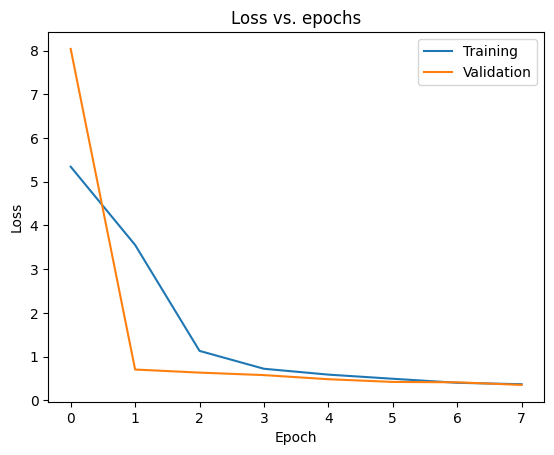

In [50]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()

In [51]:
cv_loss, cv_accuracy = model.evaluate(x_cv, y_cv)

37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3356 - sparse_categorical_accuracy: 0.9387 


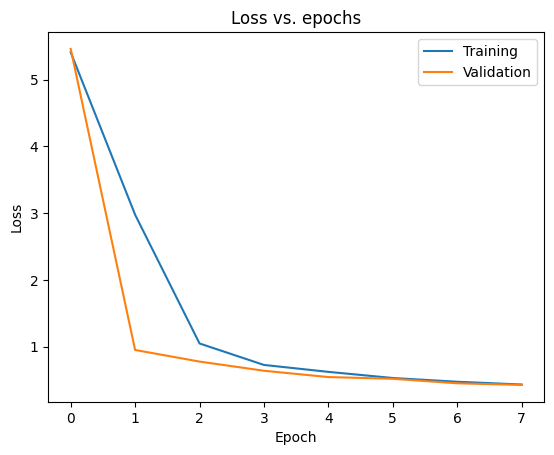

37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4124 - sparse_categorical_accuracy: 0.9408 


In [52]:
model = Sequential([
                    Flatten(input_shape = (64, 64, 1)),
                    Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.002)), # penalty rate (or lambda) =0.001
                    Dense(10, activation = 'softmax', kernel_regularizer=tf.keras.regularizers.l2(0.001))
])


model.compile(
     optimizer = tf.keras.optimizers.Adam(learning_rate = 0.005),
     loss = 'sparse_categorical_crossentropy', # Use this loss function when the y labels are integers. 
     metrics = [tf.keras.metrics.SparseCategoricalAccuracy()] # Use this accuracy when the y labels are integers.
 )

history = model.fit(x_train, y_train, epochs = 8, batch_size = 256, verbose = False, validation_split=0.2) 

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()

cv_loss, cv_accuracy = model.evaluate(x_cv, y_cv)

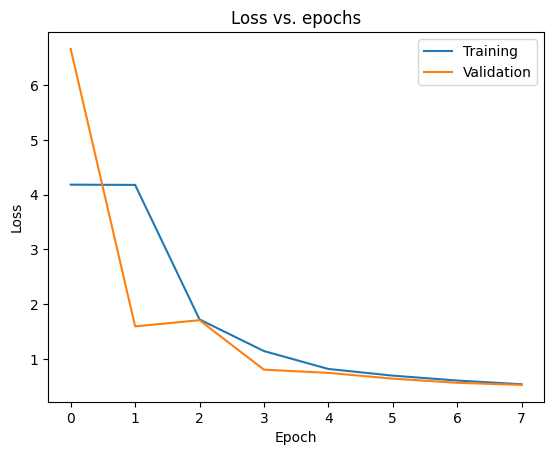

37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5180 - sparse_categorical_accuracy: 0.9285 


In [53]:
model = Sequential([
                    Flatten(input_shape = (64, 64, 1)),
                    Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.003)), # penalty rate (or lambda) =0.001
                    Dense(10, activation = 'softmax', kernel_regularizer=tf.keras.regularizers.l2(0.001))
])


model.compile(
     optimizer = tf.keras.optimizers.Adam(learning_rate = 0.005),
     loss = 'sparse_categorical_crossentropy', # Use this loss function when the y labels are integers. 
     metrics = [tf.keras.metrics.SparseCategoricalAccuracy()] # Use this accuracy when the y labels are integers.
 )

history = model.fit(x_train, y_train, epochs = 8, batch_size = 256, verbose = False, validation_split=0.2) 

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()

cv_loss, cv_accuracy = model.evaluate(x_cv, y_cv)

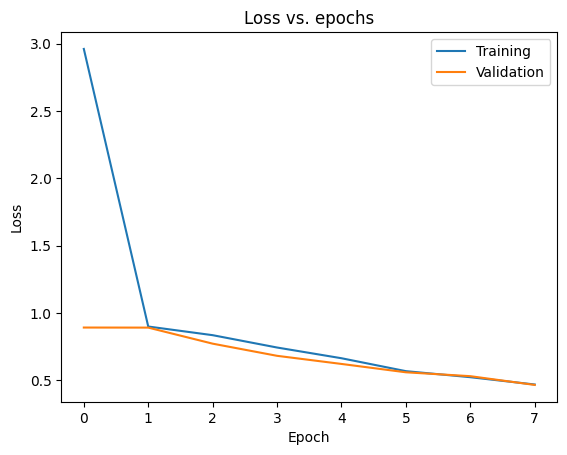

37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4497 - sparse_categorical_accuracy: 0.9459 


In [54]:
model = Sequential([
                    Flatten(input_shape = (64, 64, 1)),
                    Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.004)), # penalty rate (or lambda) =0.001
                    Dense(10, activation = 'softmax', kernel_regularizer=tf.keras.regularizers.l2(0.001))
])


model.compile(
     optimizer = tf.keras.optimizers.Adam(learning_rate = 0.005),
     loss = 'sparse_categorical_crossentropy', # Use this loss function when the y labels are integers. 
     metrics = [tf.keras.metrics.SparseCategoricalAccuracy()] # Use this accuracy when the y labels are integers.
 )

history = model.fit(x_train, y_train, epochs = 8, batch_size = 256, verbose = False, validation_split=0.2) 

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()

cv_loss, cv_accuracy = model.evaluate(x_cv, y_cv)

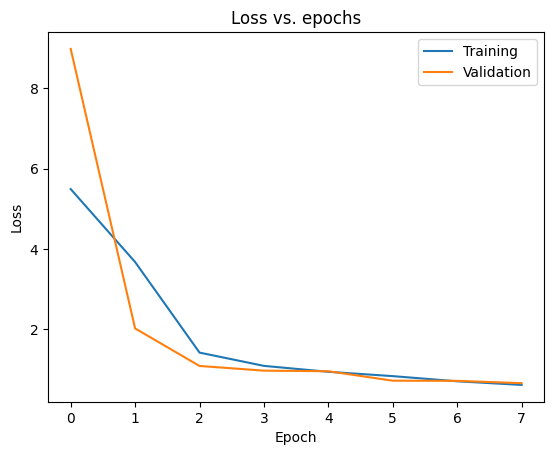

37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6324 - sparse_categorical_accuracy: 0.9140 


In [55]:
model = Sequential([
                    Flatten(input_shape = (64, 64, 1)),
                    Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.005)), # penalty rate (or lambda) =0.001
                    Dense(10, activation = 'softmax', kernel_regularizer=tf.keras.regularizers.l2(0.001))
])


model.compile(
     optimizer = tf.keras.optimizers.Adam(learning_rate = 0.005),
     loss = 'sparse_categorical_crossentropy', # Use this loss function when the y labels are integers. 
     metrics = [tf.keras.metrics.SparseCategoricalAccuracy()] # Use this accuracy when the y labels are integers.
 )

history = model.fit(x_train, y_train, epochs = 8, batch_size = 256, verbose = False, validation_split=0.2) 

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()

cv_loss, cv_accuracy = model.evaluate(x_cv, y_cv)

# Dropout Regulazation

In [56]:
model = Sequential([
                    Flatten(input_shape = (64, 64, 1)),
                    Dense(64, activation='relu'),
                    Dropout(0.5), #dropout rate 
                    Dense(10, activation = 'softmax')
])

In [57]:
model.compile(
     optimizer = tf.keras.optimizers.Adam(learning_rate = 0.005),
     loss = 'sparse_categorical_crossentropy', # Use this loss function when the y labels are integers. 
     metrics = [tf.keras.metrics.SparseCategoricalAccuracy()] # Use this accuracy when the y labels are integers.
 )

In [58]:
history = model.fit(x_train, y_train, epochs = 8, batch_size = 256, verbose = False, validation_split=0.2) 

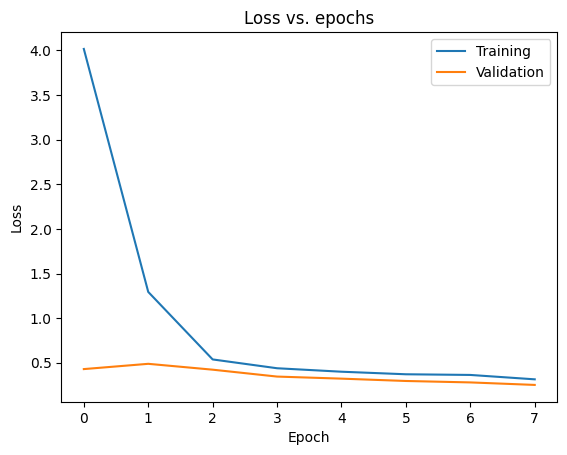

In [59]:
# Plot the training and validation loss

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()

In [60]:
cv_loss, cv_accuracy = model.evaluate(x_cv, y_cv)

37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2495 - sparse_categorical_accuracy: 0.9246 


In [61]:
model = Sequential([
                    Flatten(input_shape = (64, 64, 1)),
                    Dense(64, activation='relu'),
                    Dropout(0.6), #dropout rate 
                    Dense(10, activation = 'softmax')
])


model.compile(
     optimizer = tf.keras.optimizers.Adam(learning_rate = 0.005),
     loss = 'sparse_categorical_crossentropy', # Use this loss function when the y labels are integers. 
     metrics = [tf.keras.metrics.SparseCategoricalAccuracy()] # Use this accuracy when the y labels are integers.
 )

history = model.fit(x_train, y_train, epochs = 8, batch_size = 256, verbose = False, validation_split=0.2) 

cv_loss, cv_accuracy = model.evaluate(x_cv, y_cv)

37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2972 - sparse_categorical_accuracy: 0.9205


In [62]:
model = Sequential([
                    Flatten(input_shape = (64, 64, 1)),
                    Dense(64, activation='relu'),
                    Dropout(0.4), #dropout rate 
                    Dense(10, activation = 'softmax')
])


model.compile(
     optimizer = tf.keras.optimizers.Adam(learning_rate = 0.005),
     loss = 'sparse_categorical_crossentropy', # Use this loss function when the y labels are integers. 
     metrics = [tf.keras.metrics.SparseCategoricalAccuracy()] # Use this accuracy when the y labels are integers.
 )

history = model.fit(x_train, y_train, epochs = 8, batch_size = 256, verbose = False, validation_split=0.2) 

cv_loss, cv_accuracy = model.evaluate(x_cv, y_cv)

37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2885 - sparse_categorical_accuracy: 0.8964 


In [63]:
model = Sequential([
                    Flatten(input_shape = (64, 64, 1)),
                    Dense(64, activation='relu'),
                    Dropout(0.3), #dropout rate 
                    Dense(10, activation = 'softmax')
])


model.compile(
     optimizer = tf.keras.optimizers.Adam(learning_rate = 0.005),
     loss = 'sparse_categorical_crossentropy', # Use this loss function when the y labels are integers. 
     metrics = [tf.keras.metrics.SparseCategoricalAccuracy()] # Use this accuracy when the y labels are integers.
 )

history = model.fit(x_train, y_train, epochs = 8, batch_size = 256, verbose = False, validation_split=0.2) 

cv_loss, cv_accuracy = model.evaluate(x_cv, y_cv)

37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2035 - sparse_categorical_accuracy: 0.9259 


In [64]:
model = Sequential([
                    Flatten(input_shape = (64, 64, 1)),
                    Dense(64, activation='relu'),
                    Dropout(0.2), #dropout rate 
                    Dense(10, activation = 'softmax')
])


model.compile(
     optimizer = tf.keras.optimizers.Adam(learning_rate = 0.005),
     loss = 'sparse_categorical_crossentropy', # Use this loss function when the y labels are integers. 
     metrics = [tf.keras.metrics.SparseCategoricalAccuracy()] # Use this accuracy when the y labels are integers.
 )

history = model.fit(x_train, y_train, epochs = 8, batch_size = 256, verbose = False, validation_split=0.2) 

cv_loss, cv_accuracy = model.evaluate(x_cv, y_cv)

37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2221 - sparse_categorical_accuracy: 0.9224


# Combination

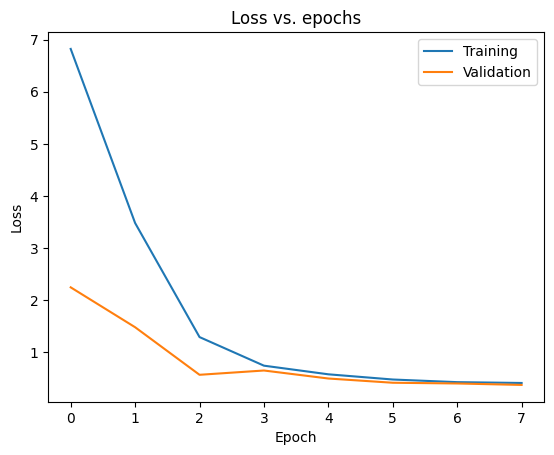

37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3697 - sparse_categorical_accuracy: 0.9332 


In [65]:
model = Sequential([
                    Flatten(input_shape = (64, 64, 1)),
                    Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)), # penalty rate (or lambda) =0.001
                    Dropout(0.2), #dropout rate 
                    Dense(10, activation = 'softmax', kernel_regularizer=tf.keras.regularizers.l2(0.001))
])


model.compile(
     optimizer = tf.keras.optimizers.Adam(learning_rate = 0.005),
     loss = 'sparse_categorical_crossentropy', # Use this loss function when the y labels are integers. 
     metrics = [tf.keras.metrics.SparseCategoricalAccuracy()] # Use this accuracy when the y labels are integers.
 )

history = model.fit(x_train, y_train, epochs = 8, batch_size = 256, verbose = False, validation_split=0.2) 

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()

cv_loss, cv_accuracy = model.evaluate(x_cv, y_cv)

In [66]:
model = Sequential([
                    Flatten(input_shape = (64, 64, 1)),
                    Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.002)), # penalty rate (or lambda) =0.001
                    Dropout(0.3), #dropout rate 
                    Dense(10, activation = 'softmax', kernel_regularizer=tf.keras.regularizers.l2(0.001))
])


model.compile(
     optimizer = tf.keras.optimizers.Adam(learning_rate = 0.005),
     loss = 'sparse_categorical_crossentropy', # Use this loss function when the y labels are integers. 
     metrics = [tf.keras.metrics.SparseCategoricalAccuracy()] # Use this accuracy when the y labels are integers.
 )

history = model.fit(x_train, y_train, epochs = 8, batch_size = 256, verbose = False, validation_split=0.2) 

cv_loss, cv_accuracy = model.evaluate(x_cv, y_cv)

37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3871 - sparse_categorical_accuracy: 0.9407 


In [67]:
model = Sequential([
                    Flatten(input_shape = (64, 64, 1)),
                    Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.003)), # penalty rate (or lambda) =0.001
                    Dropout(0.4), #dropout rate 
                    Dense(10, activation = 'softmax', kernel_regularizer=tf.keras.regularizers.l2(0.001))
])


model.compile(
     optimizer = tf.keras.optimizers.Adam(learning_rate = 0.005),
     loss = 'sparse_categorical_crossentropy', # Use this loss function when the y labels are integers. 
     metrics = [tf.keras.metrics.SparseCategoricalAccuracy()] # Use this accuracy when the y labels are integers.
 )

history = model.fit(x_train, y_train, epochs = 8, batch_size = 256, verbose = False, validation_split=0.2) 

cv_loss, cv_accuracy = model.evaluate(x_cv, y_cv)

37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4837 - sparse_categorical_accuracy: 0.9405 


In [68]:
model = Sequential([
                    Flatten(input_shape = (64, 64, 1)),
                    Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.004)), # penalty rate (or lambda) =0.001
                    Dropout(0.5), #dropout rate 
                    Dense(10, activation = 'softmax', kernel_regularizer=tf.keras.regularizers.l2(0.001))
])


model.compile(
     optimizer = tf.keras.optimizers.Adam(learning_rate = 0.005),
     loss = 'sparse_categorical_crossentropy', # Use this loss function when the y labels are integers. 
     metrics = [tf.keras.metrics.SparseCategoricalAccuracy()] # Use this accuracy when the y labels are integers.
 )

history = model.fit(x_train, y_train, epochs = 8, batch_size = 256, verbose = False, validation_split=0.2) 

cv_loss, cv_accuracy = model.evaluate(x_cv, y_cv)

37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5117 - sparse_categorical_accuracy: 0.9378 


In [69]:
model = Sequential([
                    Flatten(input_shape = (64, 64, 1)),
                    Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.005)), # penalty rate (or lambda) =0.001
                    Dropout(0.6), #dropout rate 
                    Dense(10, activation = 'softmax', kernel_regularizer=tf.keras.regularizers.l2(0.001))
])


model.compile(
     optimizer = tf.keras.optimizers.Adam(learning_rate = 0.005),
     loss = 'sparse_categorical_crossentropy', # Use this loss function when the y labels are integers. 
     metrics = [tf.keras.metrics.SparseCategoricalAccuracy()] # Use this accuracy when the y labels are integers.
 )

history = model.fit(x_train, y_train, epochs = 8, batch_size = 256, verbose = False, validation_split=0.2) 

cv_loss, cv_accuracy = model.evaluate(x_cv, y_cv)

37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6850 - sparse_categorical_accuracy: 0.9089 


# Early Stop

In [70]:
model = Sequential([
                   Flatten(input_shape = (64, 64, 1)),
                   Dense(64, activation = 'relu'),
                   Dense(10, activation = 'softmax')
])

In [71]:
model.compile(
     optimizer = tf.keras.optimizers.Adam(learning_rate = 0.005),
     loss = 'sparse_categorical_crossentropy', # Use this loss function when the y labels are integers. 
     metrics = [tf.keras.metrics.SparseCategoricalAccuracy()] # Use this accuracy when the y labels are integers.
 )

In [72]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0.01, patience=5) 

In [73]:
history = model.fit(x_train, y_train, epochs = 8, batch_size = 256, verbose = 2, validation_split=0.2,
                    callbacks=[early_stopping])

Epoch 1/8
11/11 - 1s - 75ms/step - loss: 2.2331 - sparse_categorical_accuracy: 0.6135 - val_loss: 0.3818 - val_sparse_categorical_accuracy: 0.8265
Epoch 2/8
11/11 - 0s - 10ms/step - loss: 0.3807 - sparse_categorical_accuracy: 0.8206 - val_loss: 0.4000 - val_sparse_categorical_accuracy: 0.8193
Epoch 3/8
11/11 - 0s - 10ms/step - loss: 0.3191 - sparse_categorical_accuracy: 0.8637 - val_loss: 0.2892 - val_sparse_categorical_accuracy: 0.8734
Epoch 4/8
11/11 - 0s - 10ms/step - loss: 0.2429 - sparse_categorical_accuracy: 0.9021 - val_loss: 0.2213 - val_sparse_categorical_accuracy: 0.9161
Epoch 5/8
11/11 - 0s - 10ms/step - loss: 0.2093 - sparse_categorical_accuracy: 0.9210 - val_loss: 0.2231 - val_sparse_categorical_accuracy: 0.9175
Epoch 6/8
11/11 - 0s - 10ms/step - loss: 0.2018 - sparse_categorical_accuracy: 0.9263 - val_loss: 0.2149 - val_sparse_categorical_accuracy: 0.9218
Epoch 7/8
11/11 - 0s - 10ms/step - loss: 0.1960 - sparse_categorical_accuracy: 0.9221 - val_loss: 0.1858 - val_sparse_

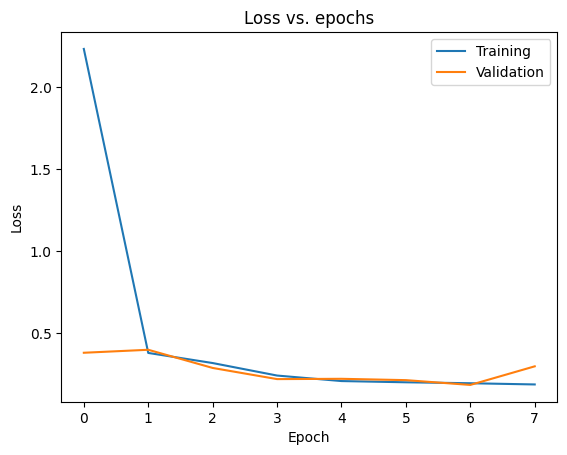

In [74]:
# Plot the training and validation loss

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()

In [75]:
# Testing mode

cv_loss, cv_accuracy = model.evaluate(x_cv, y_cv)

37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2824 - sparse_categorical_accuracy: 0.8833
